In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

In [3]:
# Import dataset
df0 = pd.read_csv('Churn_Modelling.csv')

In [4]:
df0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df0.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


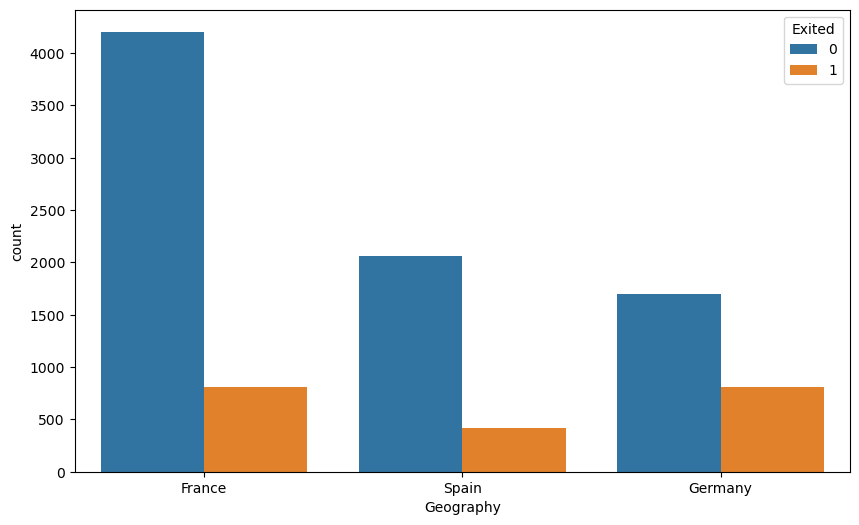

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df0)
plt.show()

C:\Users\NOVA DATA\AppData\Local\Temp\ipykernel_9992\3049880051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df0.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


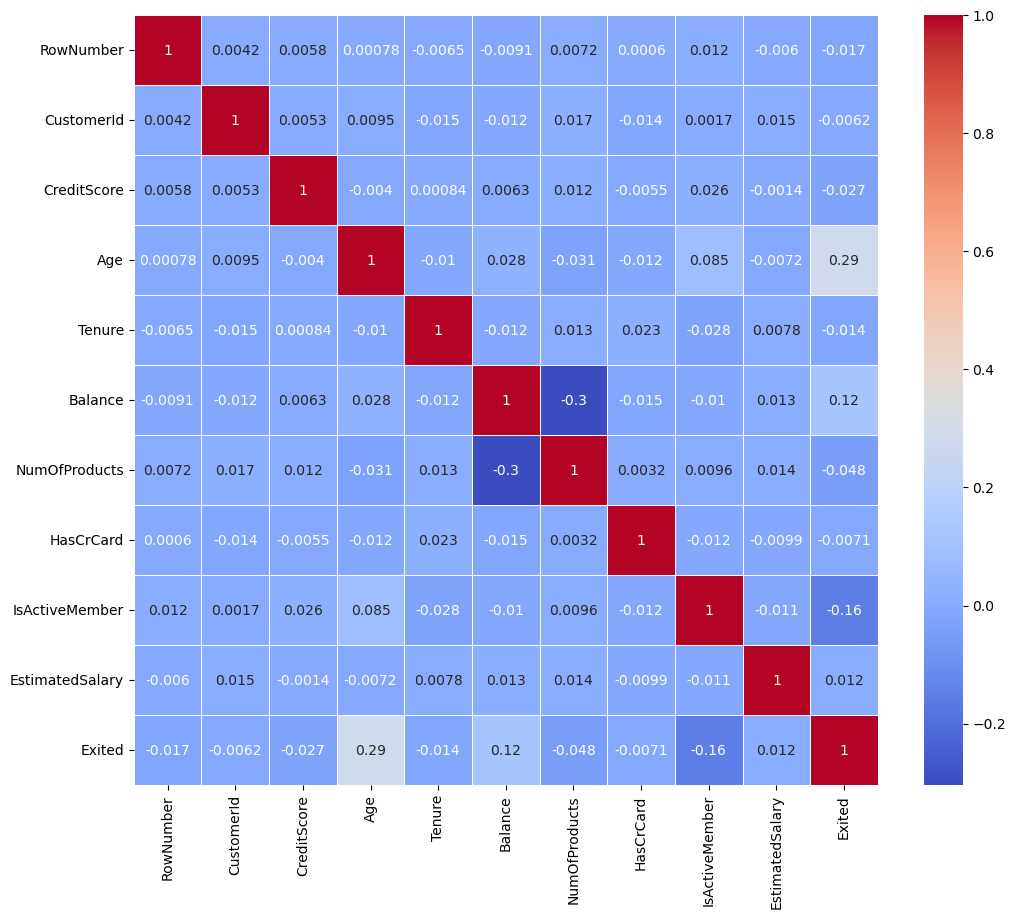

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df0.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [12]:
# Check for missing values
missing_values = df0.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# For simplicity, let's assume there are no missing values in this case
# If there are missing values, you might need to impute them using mean, median, or other strategies

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [13]:
# One-hot encoding for 'Geography' and 'Gender'
df_encoded = pd.get_dummies(df0, columns=['Geography', 'Gender'], drop_first=True)
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [15]:
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,2,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,3,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,4,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,5,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,0,0,1
9996,9997,15569892,Johnstone,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,0,0,1
9997,9998,15584532,Liu,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,9999,15682355,Sabbatini,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,1,0,1


In [16]:
# Assuming df_encoded is your DataFrame after preprocessing
df_final = df_encoded.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [17]:
df_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,1,0,1


In [18]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X = df_final.drop('Exited', axis=1)
y = df_final['Exited']

# Split the data 80/20 into an interim training set and a test set
X_interim, X_test, y_interim, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the interim training set 75/25 into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_interim, y_interim, test_size=0.25, stratify=y_interim, random_state=42)

# Display the sizes of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 6000
Validation set size: 2000
Test set size: 2000


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
logistic_pred_val = logistic_model.predict(X_val)
random_forest_pred_val = random_forest_model.predict(X_val)
decision_tree_pred_val = decision_tree_model.predict(X_val)

# Evaluate models on the validation set
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation on Validation Set:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate each model
evaluate_model("Logistic Regression", y_val, logistic_pred_val)
evaluate_model("Random Forest", y_val, random_forest_pred_val)
evaluate_model("Decision Tree", y_val, decision_tree_pred_val)

Logistic Regression Evaluation on Validation Set:
Accuracy: 0.81
Precision: 0.58
Recall: 0.21
F1 Score: 0.31

Random Forest Evaluation on Validation Set:
Accuracy: 0.86
Precision: 0.80
Recall: 0.45
F1 Score: 0.58

Decision Tree Evaluation on Validation Set:
Accuracy: 0.79
Precision: 0.49
Recall: 0.50
F1 Score: 0.50



In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
random_forest_model_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest_model_tuned, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
# Get the best model from the grid search
best_random_forest_model = grid_search.best_estimator_

# Get feature importances
feature_importances = best_random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
              Feature  Importance
1                 Age    0.237971
7     EstimatedSalary    0.147792
0         CreditScore    0.140597
3             Balance    0.137428
4       NumOfProducts    0.132260
2              Tenure    0.080716
6      IsActiveMember    0.042730
8   Geography_Germany    0.026407
10        Gender_Male    0.020022
5           HasCrCard    0.019472
9     Geography_Spain    0.014604


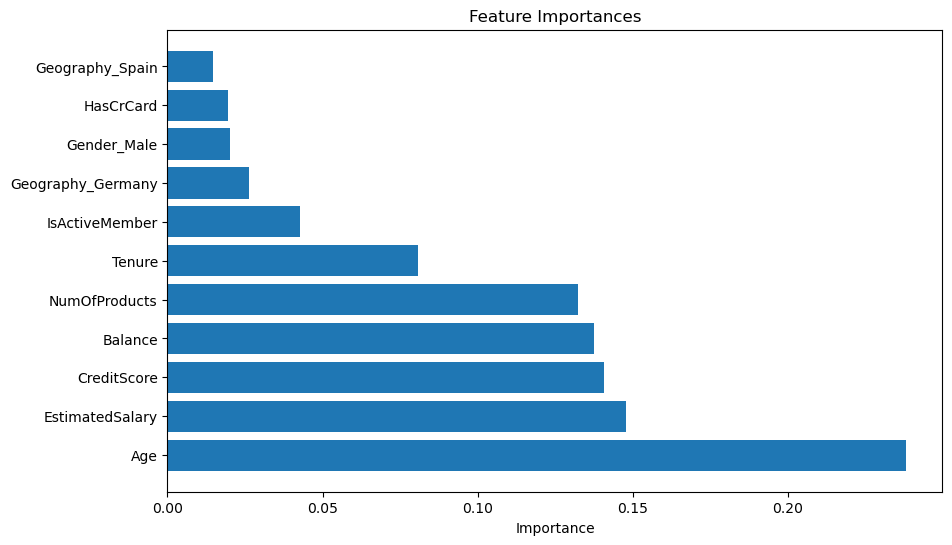

In [22]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [23]:
# Make predictions on the test set
y_test_pred_tuned = best_random_forest_model.predict(X_test)

# Evaluate performance metrics on the test set
evaluate_model("Tuned Random Forest", y_test, y_test_pred_tuned)

Tuned Random Forest Evaluation on Validation Set:
Accuracy: 0.86
Precision: 0.76
Recall: 0.45
F1 Score: 0.57



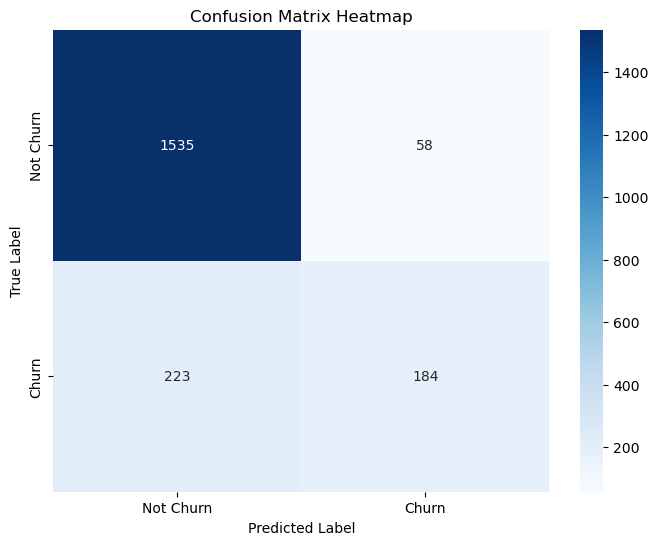

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_test_pred_tuned are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_test_pred_tuned)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Churn", "Churn"],
            yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()